In [6]:
import gensim.downloader as api
model = api.load("glove-wiki-gigaword-50")
print(model.most_similar(positive=['king', 'woman'], negative=['man']))
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("king - man + woman is closest to:", result[0])

[==================================================] 100.0% 66.0/66.0MB downloaded
[('queen', 0.8523604273796082), ('throne', 0.7664334177970886), ('prince', 0.7592144012451172), ('daughter', 0.7473883628845215), ('elizabeth', 0.7460219860076904), ('princess', 0.7424570322036743), ('kingdom', 0.7337412238121033), ('monarch', 0.721449077129364), ('eldest', 0.7184861898422241), ('widow', 0.7099431157112122)]
king - man + woman is closest to: ('queen', 0.8523604273796082)


Top 5 words similar to 'computer':
computers: 0.9165
software: 0.8815
technology: 0.8526
electronic: 0.8126
internet: 0.8060


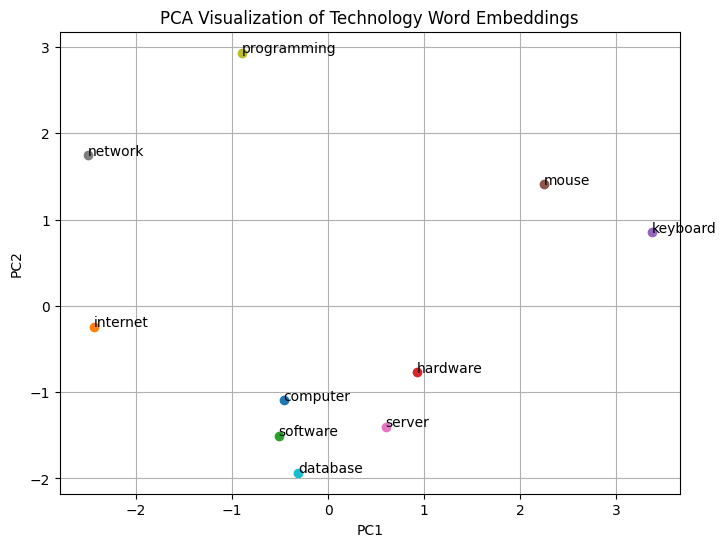

In [ ]:
import gensim.downloader as api
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
model = api.load("glove-wiki-gigaword-50")
words = ['computer', 'internet', 'software', 'hardware', 'keyboard', 'mouse', 'server', 'network', 'programming', 'database']
vectors = [model[word] for word in words]
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)
input_word = 'computer'
similar_words = model.most_similar(input_word, topn=5)
print(f"Top 5 words similar to '{input_word}':")
for word, score in similar_words:
    print(f"{word}: {score:.4f}")
plt.figure(figsize=(8, 6))
for i, word in enumerate(words):
    plt.scatter(reduced[i, 0], reduced[i, 1])
    plt.annotate(word, (reduced[i, 0], reduced[i, 1]))
plt.title("PCA Visualization of Technology Word Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [ ]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
sentences = [
    "This is a legal document about contracts.",
    "The court will review the legal case.",
    "Medical professionals require specific training.",
    "This is a medical report about the patient."
]
tokenized_sentences = [simple_preprocess(sentence) for sentence in sentences]
model = Word2Vec(
    sentences=tokenized_sentences,vector_size=50,window=5,min_count=1,workers=4,epochs=10
)
print(model.wv.most_similar('legal'))

[('case', 0.19041602313518524), ('document', 0.045007091015577316), ('contracts', -0.010094511322677135), ('the', -0.014259982854127884), ('report', -0.02316688746213913), ('court', -0.043792981654405594), ('will', -0.044073157012462616), ('review', -0.09419942647218704), ('patient', -0.12276068329811096), ('require', -0.14990590512752533)]


In [ ]:
import gensim.downloader as api
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer
from nltk.tokenize import word_tokenize
import string, os
os.environ['a'] = '1'
wv = api.load("glove-wiki-gigaword-100")
tokenizer = AutoTokenizer.from_pretrained("gpt2",local_files_only=True)
model = AutoModelForCausalLM.from_pretrained("gpt2",local_files_only=True)
gen = pipeline("text-generation", model=model, tokenizer=tokenizer, framework="pt")
def gen_resp(prompt, max_length=100):
    try:
        return gen(prompt, max_length=max_length, num_return_sequences=1)[0]['generated_text']
    except Exception as e:
        print(f"Error generating response: {e}")
prompt = "Who is king."
print(f"Original Prompt: {prompt}")
key = "king"
words = word_tokenize(prompt)
res_words = []
for w in words:
    cw = w.lower().strip(string.punctuation)
    if cw == key:
        try:
            res_words.append(wv.most_similar(cw, topn=1)[0][0])
            continue
        except KeyError:
            pass
    res_words.append(w)
enriched_prompt = " ".join(res_words)
print(f"Enriched Prompt: {enriched_prompt}")
print("\nOriginal Prompt Response:")
print(gen_resp(prompt))
print("\nEnriched Prompt Response:")
print(gen_resp(enriched_prompt))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
Device set to use cpu


Original Prompt: Who is king.


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Enriched Prompt: Who is prince .

Original Prompt Response:


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Who is king. What is king? The Lord who controls the people.

The following are the three basic concepts that you'll learn from that:

A king.

A king, when you know the king of a kingdom (or, more frequently, a political party), is a true leader. All leaders serve their people.

A king at his best, regardless of political party, is not just a leader.

In fact, a king will lead and govern

Enriched Prompt Response:
Who is prince ... in heaven"? To what? To see? To hear the things, to believe in them?... To see: that he may know that all men are created new only by God the Father and of him who created them. For I know that he is only the Eternal Father of the human race. The Lord is not the author of death and damnation but just the Creator of our universe. We must believe to see if it takes place in our own name


In [ ]:
import gensim.downloader as api
from gensim.models import KeyedVectors
import random
model = api.load("glove-wiki-gigaword-100")
def generate_similar_words(seed_word, topn=10):
    if seed_word in model:
        return [word for word, _ in model.most_similar(seed_word, topn=topn)]
    else:
        return []
def create_paragraph(seed_word):
    similar_words = generate_similar_words(seed_word, topn=10)
    if not similar_words:
        return f"No similar words found for '{seed_word}'."
    random.shuffle(similar_words)
    selected_words = similar_words[:5]
    paragraph = f"In a world defined by {seed_word}, "
    paragraph += f"people found themselves surrounded by concepts like {', '.join(selected_words[:-1])}, and {selected_words[-1]}. "
    paragraph += f"These ideas shaped the way they thought, acted, and dreamed. Every step forward in their journey reflected the essence of '{seed_word}', "
    paragraph += f"bringing them closer to understanding the true meaning of {selected_words[0]}."
    return paragraph
seed = "life"
print(create_paragraph(seed))

In a world defined by life, people found themselves surrounded by concepts like well, lives, much, work, and way. These ideas shaped the way they thought, acted, and dreamed. Every step forward in their journey reflected the essence of 'life', bringing them closer to understanding the true meaning of well.


In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
input_sentences = [
    "The new phone I bought is absolutely amazing!",
    "Worst customer service ever. I'm never coming back.",
    "The experience was average, nothing special.",
    "Fast delivery and the packaging was perfect.",
    "The product broke within two days. Very disappointed."
]
results = sentiment_pipeline(input_sentences)
print("Sentiment Analysis Results:\n")
for sentence, result in zip(input_sentences, results):
    print(f"Input Sentence: {sentence}")
    print(f"Predicted Sentiment: {result['label']}, Confidence Score: {result['score']:.2f}\n")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Sentiment Analysis Results:

Input Sentence: The new phone I bought is absolutely amazing!
Predicted Sentiment: POSITIVE, Confidence Score: 1.00

Input Sentence: Worst customer service ever. I'm never coming back.
Predicted Sentiment: NEGATIVE, Confidence Score: 1.00

Input Sentence: The experience was average, nothing special.
Predicted Sentiment: NEGATIVE, Confidence Score: 1.00

Input Sentence: Fast delivery and the packaging was perfect.
Predicted Sentiment: POSITIVE, Confidence Score: 1.00

Input Sentence: The product broke within two days. Very disappointed.
Predicted Sentiment: NEGATIVE, Confidence Score: 1.00



In [ ]:
from transformers import pipeline
summarizer = pipeline("summarization", model="t5-small")
text = """
The Industrial Revolution, which took place from the 18th to the 19th centuries,
was a period during which predominantly agrarian, rural societies in Europe and America became industrial and urban.
Prior to the Industrial Revolution, manufacturing was often done in people’s homes, using hand tools or basic machines.
Industrialization marked a shift to powered, special-purpose machinery, factories and mass production. The iron and textile industries,
along with the development of the steam engine, played central roles in the Industrial Revolution,
which also saw improved systems of transportation, communication and banking.
While industrialization brought about an increased volume and variety of
manufactured goods and an improved standard of living for some, it also resulted in often grim
employment and living conditions for the poor and working classes.
"""
summary = summarizer(text, max_length=60, min_length=30, do_sample=False)
print(summary[0]['summary_text'])

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu


the Industrial Revolution took place from the 18th to the 19th centuries . the industrial revolution marked a shift to powered, special-purpose machinery, factories and mass production . iron and textile industries, along with the development of the steam engine, played central roles .


In [5]:
from pydantic import BaseModel
from typing import List, Optional
import wikipediaapi
class InstitutionDetails(BaseModel):
    founder: Optional[str]
    founded: Optional[str]
    branches: Optional[List[str]]
    number_of_employees: Optional[int]
    summary: Optional[str]
def fetch_institution_details(name: str) -> InstitutionDetails:
    page = wikipediaapi.Wikipedia(user_agent='your-user-agent', language='en').page(name)
    if not page.exists():
        raise ValueError(f"'{name}' does not exist on Wikipedia.")

    info = {
        k.strip(): v.strip()
        for line in page.text.split('\n') if ':' in line
        for k, v in [line.split(':', 1)]
    }
    return InstitutionDetails(
        founder=info.get('Founder'),
        founded=info.get('Founded'),
        branches=info.get('Branches', '').split(',') if 'Branches' in info else None,
        number_of_employees=int(info.get('Number of employees', '0').replace(',', '') or 0),
        summary=page.summary[:500]
    )
def display(details: InstitutionDetails):
    print(f"Founder: {details.founder or 'N/A'}")
    print(f"Founded: {details.founded or 'N/A'}")
    print(f"Branches: {', '.join(details.branches) if details.branches else 'N/A'}")
    print(f"Employees: {details.number_of_employees or 'N/A'}")
    print(f"Summary: {details.summary or 'N/A'}")
if __name__ == "__main__":
    name = input("Enter institution name: ").strip()
    if name:
        try:
            display(fetch_institution_details(name))
        except ValueError as e:
            print(e)
    else:
        print("Please enter a valid institution name.")

Enter institution name: iit
Founder: N/A
Founded: N/A
Branches: N/A
Employees: N/A
Summary: The Indian Institutes of Technology (IIT) are a network of engineering and technology institutions in India. Established in 1950, they are under the purview of the Ministry of Education of the Indian Government and are governed by the Institutes of Technology Act, 1961. The Act refers to them as Institutes of National Importance and lays down their powers, duties, and framework for governance as the country's premier institutions in the field of technology. 23 IITs currently fall under the purvi
